# IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# LOADING DATASETS

In [2]:
product = pd.read_csv("product.csv")
product.head()

,ID,Building,Year of sale,Month of sale,Type of property,Property #,Area (ft.),Price,Status
0,1030,1,2005.0,11.0,Apartment,30,743.09,246172.68,Sold
1,1029,1,2005.0,10.0,Apartment,29,756.21,246331.90,Sold
2,2002,2,2007.0,7.0,Apartment,2,587.28,209280.91,Sold
3,2031,2,2007.0,12.0,Apartment,31,1604.75,452667.01,Sold
4,1049,1,2004.0,11.0,Apartment,49,1375.45,467083.31,Sold


In [3]:
customer = pd.read_csv("customer.csv")
customer.head()

,Customer ID,Entity,Name,Surname,Age at time of purchase,Interval,Y,M,D,Gender,Country,State,Purpose,Deal satisfaction,Mortgage,Source
0,C0028,Individual,Madalyn,Mercer,19.00,18-25,1986.0,6.0,21.0,F,USA,California,Home,5.0,No,Website
1,C0027,Individual,Lara,Carrillo,22.00,18-25,1983.0,2.0,24.0,F,USA,California,Home,5.0,No,Website
2,C0112,Individual,Donavan,Flowers,22.00,18-25,1985.0,12.0,27.0,M,USA,California,Home,1.0,Yes,Client
3,C0160,Individual,Darien,Dorsey,22.00,18-25,1985.0,12.0,27.0,M,USA,California,Investment,3.0,Yes,Website
4,C0014,Individual,Alessandra,Perry,25.00,18-25,1979.0,5.0,15.0,F,USA,California,Home,4.0,No,Agency


# ACTUAL DATA PREPARATION

We have to make two sets of data, i.e. 

- x set of the attributes of house from the product dataset (Area.ft & Price)
- y set of the target function containing 1 to 5 ratings from the customer dataset (Deal Satisfaction Ratings)

In [4]:
dict_data = {"Area (ft)":product["Area (ft.)"], "Price":product["Price"]}
house_measure = pd.DataFrame(data=dict_data)

In [5]:
x = house_measure[0:195]
x.tail()

,Area (ft),Price
190,1160.36,398903.42
191,743.09,210745.17
192,1160.36,331154.88
193,625.80,204434.68
194,756.21,189194.31


In [6]:
y = customer["Deal satisfaction"].dropna().astype("O")
y.tail()

191    5
192    5
193    5
194    5
195    5
Name: Deal satisfaction, dtype: object

In [7]:
le = LabelEncoder()

In [8]:
le.fit(y)

LabelEncoder()

In [9]:
y = le.transform(y)
y

array([4, 4, 0, 2, 3, 4, 4, 4, 1, 2, 0, 4, 2, 1, 4, 4, 3, 3, 4, 2, 4, 4,
       4, 3, 3, 4, 0, 0, 2, 3, 1, 2, 3, 2, 1, 4, 2, 0, 0, 4, 4, 1, 2, 1,
       4, 0, 2, 3, 1, 0, 3, 4, 4, 0, 1, 3, 2, 2, 0, 1, 1, 1, 4, 4, 0, 3,
       4, 2, 4, 3, 3, 4, 0, 4, 3, 2, 2, 0, 2, 3, 1, 2, 3, 1, 4, 3, 4, 4,
       1, 4, 3, 1, 0, 4, 4, 0, 1, 0, 0, 3, 4, 3, 3, 4, 4, 3, 1, 2, 2, 2,
       4, 4, 4, 4, 2, 2, 2, 4, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 1, 2, 1, 1,
       4, 4, 2, 2, 4, 4, 3, 2, 2, 3, 2, 4, 3, 2, 4, 4, 4, 4, 4, 4, 4, 4,
       3, 3, 2, 3, 2, 0, 4, 4, 3, 4, 1, 4, 2, 1, 4, 4, 2, 2, 1, 1, 2, 4,
       3, 2, 4, 4, 3, 4, 0, 0, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4],
      dtype=int64)

# SOME DESCRIPTIVE ANALYSIS ON 'x' DATASET

In [10]:
# description of x set

x.describe()

,Area (ft),Price
count,195.000000,195.000000
mean,905.732154,271120.972667
std,268.054294,82179.704080
min,410.710000,117564.070000
25%,743.090000,213231.695000
50%,790.540000,244820.670000
75%,1101.125000,310400.165000
max,1942.500000,532877.380000


In [11]:
# description of y set

y.dtype

dtype('int64')

In [12]:
# Correlation matrix of x set

print(x.corr())
print("\nBoth the attributes of x are highly correlated")

           Area (ft)     Price
Area (ft)   1.000000  0.944204
Price       0.944204  1.000000

Both the attributes of x are highly correlated


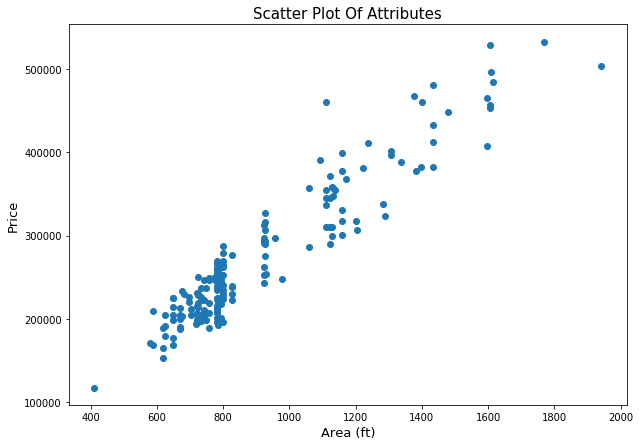

In [13]:
# Scatter Plot of the attributes

plt.figure(figsize=(10,7))
plt.title("Scatter Plot Of Attributes",fontsize=15)
plt.xlabel("Area (ft)",fontsize=13)
plt.ylabel("Price",fontsize=13)
plt.scatter(x["Area (ft)"],x["Price"])
plt.show()

In [14]:
# max and min values of attributes

print("Max value of Area (ft) is ",x["Area (ft)"].max())
print("Max value of Price is ",x["Price"].max())
print("Min value of Area (ft) is ",x["Area (ft)"].min())
print("Min value of Price is ",x["Price"].min())

Max value of Area (ft) is  1942.5
Max value of Price is  532877.38
Min value of Area (ft) is  410.71
Min value of Price is  117564.07


In [15]:
# Central Tendencies of attributes

print("==== Means ====")
print("Mean Value of Area (ft): ",x["Area (ft)"].mean())
print("Mean Value of Price: ",x["Price"].mean())

print("\n==== Medians ====")
print("Median Value of Area (ft): ",x["Area (ft)"].median())
print("Median Value of Prtce: ",x["Price"].median())

print("\n==== Standard Deviations ====")
print("Standard Deviation of Area (ft): ",x["Area (ft)"].std())
print("Standard Deviation of Price: ",x["Price"].std())


==== Means ====
Mean Value of Area (ft):  905.7321538461538
Mean Value of Price:  271120.9726666669

==== Medians ====
Median Value of Area (ft):  790.54
Median Value of Prtce:  244820.67

==== Standard Deviations ====
Standard Deviation of Area (ft):  268.05429392614514
Standard Deviation of Price:  82179.70408008099


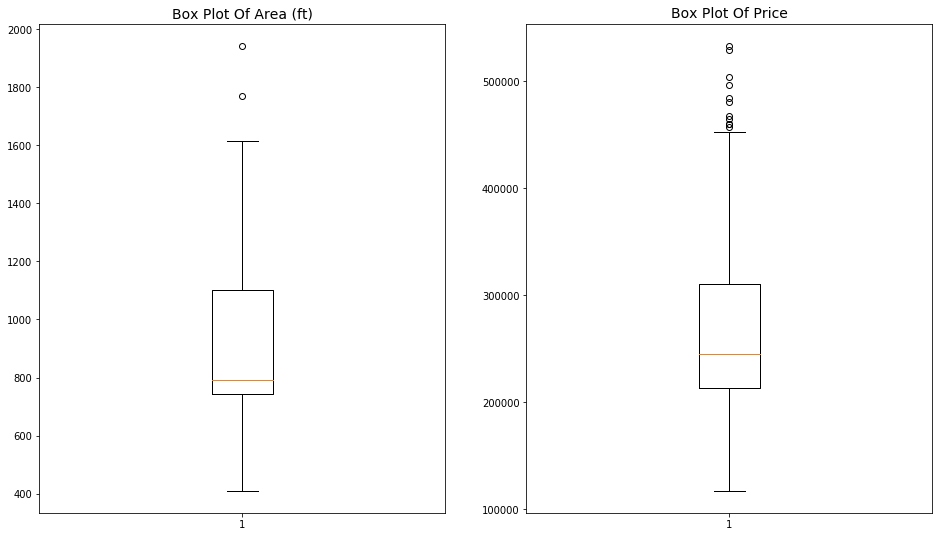

In [16]:
# Box Plots of attributes

plt.figure(figsize=(16,9))

plt.subplot(1,2,1)
plt.boxplot(x["Area (ft)"])
plt.title("Box Plot Of Area (ft)",fontsize=14)

plt.subplot(1,2,2)
plt.boxplot(x["Price"])
plt.title("Box Plot Of Price",fontsize=14)

plt.show()

# SPLITTING DATA INTO TRAIN AND TEST

In [233]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 7, train_size=0.92)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [234]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(179, 2)
(16, 2)
(179,)
(16,)


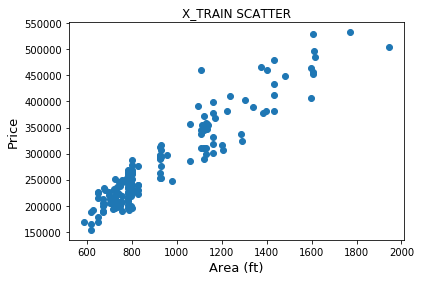

In [235]:
plt.title("X_TRAIN SCATTER")
plt.xlabel("Area (ft)",fontsize=13)
plt.ylabel("Price",fontsize=13)
plt.scatter(x_train["Area (ft)"],x_train["Price"])
plt.show()

In [236]:
x_train.corr()

,Area (ft),Price
Area (ft),1.000000,0.942917
Price,0.942917,1.000000


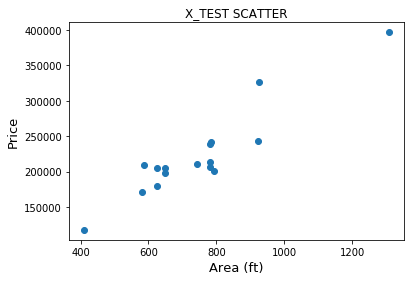

In [237]:
plt.title("X_TEST SCATTER")
plt.scatter(x_test["Area (ft)"],x_test["Price"])
plt.xlabel("Area (ft)",fontsize=13)
plt.ylabel("Price",fontsize=13)
plt.show()

In [238]:
x_test.corr()

,Area (ft),Price
Area (ft),1.000000,0.932295
Price,0.932295,1.000000


# RANDOM FOREST CLASSIFIER MODEL

Building Model

In [281]:
lr = RandomForestClassifier(n_estimators=5, max_features="sqrt", verbose=4, criterion="entropy", random_state=30, min_impurity_split=0.65)

Fitting Train Values

In [282]:
m1 = lr.fit(x_train,y_train)

building tree 1 of 5
building tree 2 of 5
building tree 3 of 5
building tree 4 of 5
building tree 5 of 5


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
C:\Users\hp\Anaconda3\lib\site-packag

Predicting Test Sets

In [283]:
yp1 = m1.predict(x_test)

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [284]:
yp1

array([1, 4, 4, 4, 1, 4, 3, 2, 4, 4, 2, 0, 4, 2, 4, 2], dtype=int64)

Visualizing Output

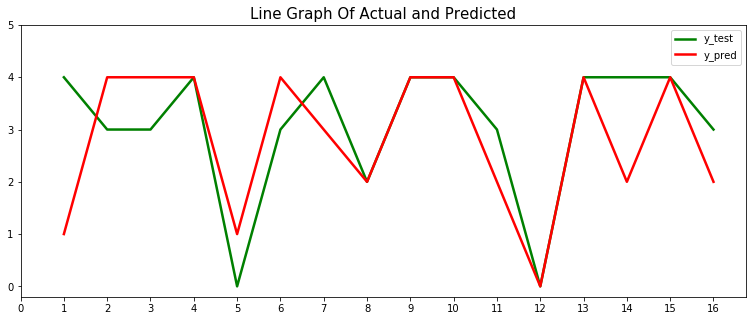

In [291]:
c = [i for i in range(1,17)]
fig = plt.figure(figsize=(13,5))
plt.plot(c,y_test, color="green", linewidth=2.5, linestyle="-")
plt.plot(c,yp1, color="red", linewidth=2.5, linestyle="-")
plt.title("Line Graph Of Actual and Predicted", fontsize=15)
plt.xlabel("", fontsize=15)
plt.ylabel("", fontsize=15)
plt.yticks(np.arange(0,6))
plt.xticks(np.arange(0,17,1))
plt.legend(labels=["y_test","y_pred"])
plt.show()

Confusion Matrix

In [286]:
cm = confusion_matrix(y_test, yp1)
cm

array([[1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 2, 0, 3],
       [0, 1, 1, 1, 5]], dtype=int64)

Accuracy

In [287]:
acc = accuracy_score(y_test,yp1)
acc = acc * 100
acc

43.75